### DS7337 NLP - HW 1 
#### David Wei

<u>**HW 1:**</u>

1.Follow the instructions in chapter 1 of Bird-Klein for implementing a “lexical diversity” scoring routine. [book link](http://www.nltk.org/book/)

2.Go to http://www.gutenberg.org/wiki/Children%27s_Instructional_Books_(Bookshelf), and obtain three texts (of different grade levels) from the “Graded Readers” section. Report the lexical diversity score of each. Explain whether the result was surprising.

3.Also compare the vocabulary size of the same three texts. Explain whether the result was surprising. 

4.Write a paragraph arguing whether vocabulary size and lexical diversity in combination could be a better measure of text difficulty (or reading level) than either measure is by itself.


### Identifying Text to Analyze

<u>**3 text levels:**</u>
- 3rd: [The Project Gutenberg EBook of McGuffey's Third Eclectic Reader](https://www.gutenberg.org/cache/epub/14766/pg14766.txt)
- 5th: [The Project Gutenberg EBook of McGuffey's Fifth Eclectic Reader](https://www.gutenberg.org/cache/epub/15040/pg15040.txt)
- 7th: [The Literary World Seventh Reader by Browne, Metcalf, and Withers](http://www.gutenberg.org/ebooks/19721)

### Importing and Creating Text Objects

In [1]:
import nltk
from urllib import request
from nltk import word_tokenize
import re #regular expressions to clean up

#3rd
text1_url = "https://www.gutenberg.org/cache/epub/14766/pg14766.txt"
#5th
text2_url = "https://www.gutenberg.org/cache/epub/15040/pg15040.txt"
#7th
text3_url = "https://www.gutenberg.org/cache/epub/19721/pg19721.txt"

#combined
text_urls = ["https://www.gutenberg.org/cache/epub/14766/pg14766.txt",
            "https://www.gutenberg.org/cache/epub/15040/pg15040.txt",
            "https://www.gutenberg.org/cache/epub/19721/pg19721.txt",]

# reads in electronic book
def getRaw(text):
    url = text
    response = request.urlopen(url)
    raw = response.read().decode('utf8')
    raw_character_count = len(raw)
    return raw, raw_character_count

# gets the title of book by searching for each group based on the 'Title:' keyword
def getTitle(text):
    raw = getRaw(text)[0]
    search_title = re.search('Title:(.*)', raw) #finds entire group
    title = search_title.group(1).replace("\r", ' ').strip()
    return title

# converts token into NLKT text object for linguistic processing
def getNLKTText(text):
    raw = getRaw(text)[0]
    # tokenization to break up string into words and punctuation
    tokens = word_tokenize(raw)
    text = nltk.Text(tokens)
    return text

### Finding Lexical Diversity & Vocabulary Size

What is lexical diversity? Lexical words are words such as nouns, adjectives, verbs, and adverbs that convey meaning in a text. They’re the words that you’d expect a child to use when first learning to speak. For example, ‘cat’ ‘play’ and ‘red’. [Source](https://textinspector.com/help/lexical-diversity/#:~:text=What%20is%20Lexical%20Diversity%3F,convey%20meaning%20in%20a%20text.)

In [2]:
def lexical_diversity(my_text_data):
    word_count = len(my_text_data)
    vocab_size = len(set(my_text_data))
    diversity_score = vocab_size / word_count
    return word_count, vocab_size, diversity_score

In [3]:
%%time
# create empty list to store text lexical diversity summaries
lexical_diversity_total = []
raw_counts = []
book_titles = []

# loop through each text url, convert to NLKT text object format and then create lexical summary
for url in text_urls:
    nlkt_text = getNLKTText(url)
    # retrivies original raw string count
    raw_count = getRaw(url)[1]
    # retrieves book title
    book_title = getTitle(url)
    lexical_summary = list(lexical_diversity(nlkt_text))
    
    # append to empty lexical diversity summary
    lexical_diversity_total.append(lexical_summary)
    # appends original raw count
    raw_counts.append(raw_count)
    # append to empty book title 
    book_titles.append(book_title)
    
print(lexical_diversity_total)
print('='*80)
print(raw_counts)
print('='*80)
print(book_titles)

[[37993, 4713, 0.12404916695180691], [126615, 14290, 0.1128618252181811], [128420, 13062, 0.10171312879613767]]
[168159, 605278, 621668]
["McGuffey's Third Eclectic Reader", "McGuffey's Fifth Eclectic Reader", 'The Literary World Seventh Reader']
Wall time: 4.68 s


### Analyzing Lexical Diversity

To begin our analysis, we will start by converting our list of lexical diversity summaries into a manageable dataframe.

In [4]:
import pandas as pd

#create df from list
lexical_diversity_total_df = pd.DataFrame(lexical_diversity_total, 
                                            columns=['tokenized_word_count', 'vocab_size', 'diversity_score'])
raw_counts_df = pd.DataFrame(raw_counts, columns=['raw_word_count'])
book_title_df = pd.DataFrame(book_titles, columns=['book_title'])

print(lexical_diversity_total_df)
print(book_title_df)
print('='*80)

#join in our book names
final_df_list = [book_title_df, raw_counts_df, lexical_diversity_total_df]
lexical_summary_df = pd.concat(final_df_list,axis=1)
print(lexical_summary_df)

   tokenized_word_count  vocab_size  diversity_score
0                 37993        4713         0.124049
1                126615       14290         0.112862
2                128420       13062         0.101713
                          book_title
0   McGuffey's Third Eclectic Reader
1   McGuffey's Fifth Eclectic Reader
2  The Literary World Seventh Reader
                          book_title  raw_word_count  tokenized_word_count  \
0   McGuffey's Third Eclectic Reader          168159                 37993   
1   McGuffey's Fifth Eclectic Reader          605278                126615   
2  The Literary World Seventh Reader          621668                128420   

   vocab_size  diversity_score  
0        4713         0.124049  
1       14290         0.112862  
2       13062         0.101713  


#### Finding correlation between the raw_word_count and the vocabulary size

In [6]:
lexical_summary_df['raw_word_count'].corr(lexical_summary_df['vocab_size'])

0.9887765023315147

#### Finding correlation between the tokenized vocabulary size and it's lexical diversity

In [7]:
lexical_summary_df['vocab_size'].corr(lexical_summary_df['diversity_score'])

-0.8016776123585772

Text(0.5, 1.0, 'Fig 1. Corr Vocab_Size vs Lex_Diversity')

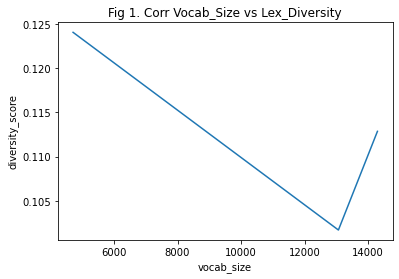

In [10]:
import seaborn as sns
sns.lineplot(data=lexical_summary_df, x="vocab_size", y="diversity_score").set_title('Fig 1. Corr Vocab_Size vs Lex_Diversity')

We can see that interestingly, the more "advanced" the text books (comparing 3rd grade books to 7th grade books") becomes, the less diverse the vocabulary actually gets. This phenomenon has actually been researched ([Source](https://lps.library.cmu.edu/LDR/article/id/77/)) and found that the lexical richness found in children's books is actually very strong in terms of the use of verbs whereas books directed towards an older audience (7th grade) is more abstract in the uses of entities rather words.

There is also a very clear distinction separate from lexical diversity that shows an increase in the vocabulary size as the grade level of the books increases. Finding the correlation between the **raw_word_count** which provides us a pre-tokenzed version of the text and the tokenized version of the **vocab_size provides** a very high correaltion (.98) demonstrating that the two share a strong relationship. However, we can see that though the raw_word_count increases, the tokenized vocab_size actually increase then decreases from 5th to 7th grade suggesting a non-linear relationship between the vocab_size and the text's lexical diversity.

Now that the relationship between vocabulary size (tokenized) and the lexical diversity has been established, we want to answer the question: does vocab size and lexical diveristy measure text difficulty better individually or together holistically? From the evidence, we can see that the two attributes have a relationship but one that isn't strong enough to omit one or the other entirely as a measurement of text difficulty. Given the non-linear relationship we can visually observe in Fig 1., I'd argue that to measure text difficulty, it's best to use both of these properties of text together. 